<a href="https://colab.research.google.com/github/jb19074/Finance-App-Reviews/blob/main/SyfeAppReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vaderSentiment
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import vaderSentiment

from google_play_scraper import app
from google_play_scraper import Sort, reviews_all, reviews

vds = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
us_reviews = reviews_all(
    'com.syfe',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='sg', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [8]:
df = pd.DataFrame(np.array(us_reviews),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))

df.head(25)

reviewId             userName  \
0   b0c94b93-a3f3-4443-a104-7229dd5920c6             Sean Ong   
1   c64f76d6-ff6d-4c7c-b67c-47f05390c6a5                  Kit   
2   08b5d054-3109-475a-9b42-594e29d55cfe       Sureind Mishra   
3   c1aa1a1a-a9b6-4b92-93b5-49f4feac6dc5                Ken T   
4   fea78d34-5496-4720-91e9-dd8cf303462b                Frank   
5   ed4d7507-6256-495a-ab8d-98ec76c2ff86         Wei Hern Lee   
6   ddef98e7-6741-499e-b48e-fd199a0c171a            Zelda Xie   
7   8b19fb9c-06b2-4ced-ac14-08c01ff48d2c           Melvin Tan   
8   036c6c9a-1153-4f25-a0c9-bf27878c103b           Thabo Mabe   
9   9c9478fc-962d-4fc6-aab3-ba5eac5cfa4c            Alvin Lim   
10  4b792bc4-632e-49d5-8bc6-c287b7c826c6  Oossft Gallowsraven   
11  87edcbf7-c1a9-4c50-a2b2-35cbb2a02e04        Weiliang Song   
12  a3b70d69-2107-41f8-a7a9-753e160f5a40           David Chua   
13  6244bf05-87a4-4877-b3d9-aede1b1f0639            Weijia Ho   
14  81fd43f7-61a1-4f6f-a2fb-38bdc6dd6153        Joanna Ernest   
15  0bb04928-73e4-4cf0-80a1-233cc51b6635      Ankur Chowdhary   
16  de68d092-decd-4966-b2b9-6e80eafca54a       toSimplicity -   
17  0a810357-d5e2-4b14-b3a2-182593b5d3e4            Doary Pan   
18  6007a8c3-ab76-4253-9ac7-bc61a9ea1b06               EK Tan   
19  af041dd3-105d-4415-96b2-35f7e9d9ac37           haydon roy   
20  df052d94-5cbe-47f1-b240-2fc5b5ede528            Keith Lim   
21  e5882022-7314-48bc-9d43-6d98fb448995        Cheong Jeremy   
22  a1d3835f-cd3a-402a-9489-be28cb32c460           zaid lazim   
23  32fa2a37-6c52-4177-8b6c-ed3cb5c4463f           Kian Thong   
24  2e322313-2aef-4ec2-b828-14db7458240e             lynn lim   

                                            userImage  \
0   https://play-lh.googleusercontent.com/a/AEdFTp...   
1   https://play-lh.googleusercontent.com/a-/AD5-W...   
2   https://play-lh.googleusercontent.com/a/AEdFTp...   
3   https://play-lh.googleusercontent.com/a-/AD5-W...   
4   https://play-lh.googleusercontent.com/a/AEdFTp...   
5   https://play-lh.googleusercontent.com/a/AEdFTp...   
6   https://play-lh.googleusercontent.com/a-/AD5-W...   
7   https://play-lh.googleusercontent.com/a-/AD5-W...   
8   https://play-lh.googleusercontent.com/a/AEdFTp...   
9   https://play-lh.googleusercontent.com/a-/AD5-W...   
10  https://play-lh.googleusercontent.com/a-/AD5-W...   
11  https://play-lh.googleusercontent.com/a-/AD5-W...   
12  https://play-lh.googleusercontent.com/a/AEdFTp...   
13  https://play-lh.googleusercontent.com/a/AEdFTp...   
14  https://play-lh.googleusercontent.com/a-/AD5-W...   
15  https://play-lh.googleusercontent.com/a-/AD5-W...   
16  https://play-lh.googleusercontent.com/a/AEdFTp...   
17  https://play-lh.googleusercontent.com/a-/AD5-W...   
18  https://play-lh.googleusercontent.com/a/AEdFTp...   
19  https://play-lh.googleusercontent.com/a/AEdFTp...   
20  https://play-lh.googleusercontent.com/a-/AD5-W...   
21  https://play-lh.googleusercontent.com/a/AEdFTp...   
22  https://play-lh.googleusercontent.com/a-/AD5-W...   
23  https://play-lh.googleusercontent.com/a/AEdFTp...   
24  https://play-lh.googleusercontent.com/a-/AD5-W...   

                                              content  score  thumbsUpCount  \
0   Old ui was better. Now it's so difficult to na...      4              1   
1   Previously on login we cud see at a glance how...      1              1   
2   Hi Syfe, I'm looking forward for Syfe to offer...      5              0   
3   Great so far. I keep losing money. Though I ca...      5              0   
4                                app is not launching      5              0   
5   Unable to log in.. prompted to put in verifica...      1              3   
6   I changed my number and am unable to log in. V...      2              2   
7                     No response from their support.      1              0   
8                                                None      5              0   
9   All the empty promises. Invest 2y and stuck, 0...      1        

In [9]:
content = " ".join(content for content in df.content)

In [10]:
stop_words = ['invest', 'investing', 'investment', 'Syfe', 'syfe', 'apps', 'app', 'use', 'money'] + list(STOPWORDS)

In [11]:
word_cloud = WordCloud(stopwords = stop_words, collocations = False, background_color = 'white', width=3000, height=2000, max_words=500).generate(content)

(-0.5, 2999.5, 1999.5, -0.5)

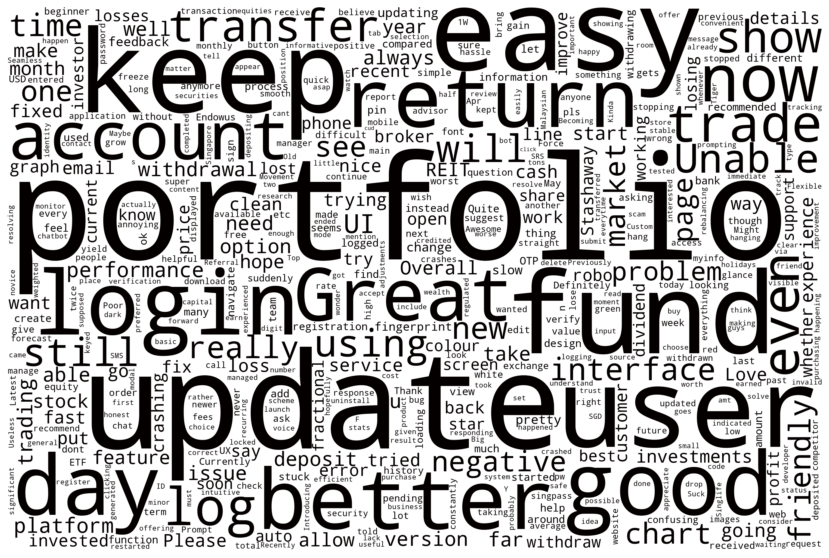

In [12]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the word color to black
word_cloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(word_cloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

In [13]:
#@title Compound Scores
df['compound'] = [vds.polarity_scores(x)['compound'] for x in df['content']]
df['neg'] = [vds.polarity_scores(x)['neg'] for x in df['content']]
df['neu'] = [vds.polarity_scores(x)['neu'] for x in df['content']]
df['pos'] = [vds.polarity_scores(x)['pos'] for x in df['content']]

for sentence in df['content']:
    vs = vds.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs)))
  

In [14]:
#df['scores'] = df['content'].apply(lambda review: vds.polarity_scores(content))
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

reviewId        userName  \
0  b0c94b93-a3f3-4443-a104-7229dd5920c6        Sean Ong   
1  c64f76d6-ff6d-4c7c-b67c-47f05390c6a5             Kit   
2  08b5d054-3109-475a-9b42-594e29d55cfe  Sureind Mishra   
3  c1aa1a1a-a9b6-4b92-93b5-49f4feac6dc5           Ken T   
4  fea78d34-5496-4720-91e9-dd8cf303462b           Frank   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AEdFTp...   
1  https://play-lh.googleusercontent.com/a-/AD5-W...   
2  https://play-lh.googleusercontent.com/a/AEdFTp...   
3  https://play-lh.googleusercontent.com/a-/AD5-W...   
4  https://play-lh.googleusercontent.com/a/AEdFTp...   

                                             content  score  thumbsUpCount  \
0  Old ui was better. Now it's so difficult to na...      4              1   
1  Previously on login we cud see at a glance how...      1              1   
2  Hi Syfe, I'm looking forward for Syfe to offer...      5              0   
3  Great so far. I keep losing money. Though I ca...      5              0   
4                               app is not launching      5              0   

  reviewCreatedVersion                  at  \
0                7.6.2 2023-01-05 02:54:52   
1                 None 2022-12-28 02:54:36   
2                7.6.2 2022-12-22 09:08:12   
3                7.5.0 2022-12-17 11:58:41   
4                6.9.0 2022-11-18 07:58:23   

                                        replyContent           repliedAt  \
0  Hi Sean, thank you for your rating and for you... 2023-01-11 11:18:37   
1  Hi Kit, thank you for your feedback and we app... 2023-01-04 03:40:37   
2  Hi Sureind, thank you for your review. The SRS... 2022-12-22 10:14:43   
3                                               None                 NaT   
4  Hi Frank, please send us more details regardin... 2022-11-22 10:46:08   

   compound    neg    neu    pos comp_score  
0   -0.0878  0.229  0.566  0.205        neg  
1   -0.2549  0.119  0.791  0.090        neg  
2    0.0000  0.000  1.000  0.000        pos  
3    0.7246  0.131  0.459  0.410        pos  
4    0.0000  0.000  1.000  0.000        pos

In [15]:
pos_content = df[df.comp_score == 'pos']
neg_content = df[df.comp_score == 'neg']

In [16]:
pos_content.head(3)

reviewId        userName  \
2  08b5d054-3109-475a-9b42-594e29d55cfe  Sureind Mishra   
3  c1aa1a1a-a9b6-4b92-93b5-49f4feac6dc5           Ken T   
4  fea78d34-5496-4720-91e9-dd8cf303462b           Frank   

                                           userImage  \
2  https://play-lh.googleusercontent.com/a/AEdFTp...   
3  https://play-lh.googleusercontent.com/a-/AD5-W...   
4  https://play-lh.googleusercontent.com/a/AEdFTp...   

                                             content  score  thumbsUpCount  \
2  Hi Syfe, I'm looking forward for Syfe to offer...      5              0   
3  Great so far. I keep losing money. Though I ca...      5              0   
4                               app is not launching      5              0   

  reviewCreatedVersion                  at  \
2                7.6.2 2022-12-22 09:08:12   
3                7.5.0 2022-12-17 11:58:41   
4                6.9.0 2022-11-18 07:58:23   

                                        replyContent           repliedAt  \
2  Hi Sureind, thank you for your review. The SRS... 2022-12-22 10:14:43   
3                                               None                 NaT   
4  Hi Frank, please send us more details regardin... 2022-11-22 10:46:08   

   compound    neg    neu   pos comp_score  
2    0.0000  0.000  1.000  0.00        pos  
3    0.7246  0.131  0.459  0.41        pos  
4    0.0000  0.000  1.000  0.00        pos

In [17]:
neg_content.head(3)

reviewId    userName  \
0   b0c94b93-a3f3-4443-a104-7229dd5920c6    Sean Ong   
1   c64f76d6-ff6d-4c7c-b67c-47f05390c6a5         Kit   
12  a3b70d69-2107-41f8-a7a9-753e160f5a40  David Chua   

                                            userImage  \
0   https://play-lh.googleusercontent.com/a/AEdFTp...   
1   https://play-lh.googleusercontent.com/a-/AD5-W...   
12  https://play-lh.googleusercontent.com/a/AEdFTp...   

                                              content  score  thumbsUpCount  \
0   Old ui was better. Now it's so difficult to na...      4              1   
1   Previously on login we cud see at a glance how...      1              1   
12  The team manager use my portfolio to threaten ...      1              0   

   reviewCreatedVersion                  at  \
0                 7.6.2 2023-01-05 02:54:52   
1                  None 2022-12-28 02:54:36   
12                7.2.2 2022-10-17 09:57:25   

                                         replyContent           repliedAt  \
0   Hi Sean, thank you for your rating and for you... 2023-01-11 11:18:37   
1   Hi Kit, thank you for your feedback and we app... 2023-01-04 03:40:37   
12                                               None                 NaT   

    compound    neg    neu    pos comp_score  
0    -0.0878  0.229  0.566  0.205        neg  
1    -0.2549  0.119  0.791  0.090        neg  
12   -0.5996  0.159  0.786  0.055        neg

# Negative Review Word Cloud

In [18]:
negative_review = " ".join(content for content in neg_content.content)
word_cloud = WordCloud(stopwords = stop_words, collocations = False, background_color = 'white', width=3000, height=2000, max_words=500).generate(negative_review)

(-0.5, 2999.5, 1999.5, -0.5)

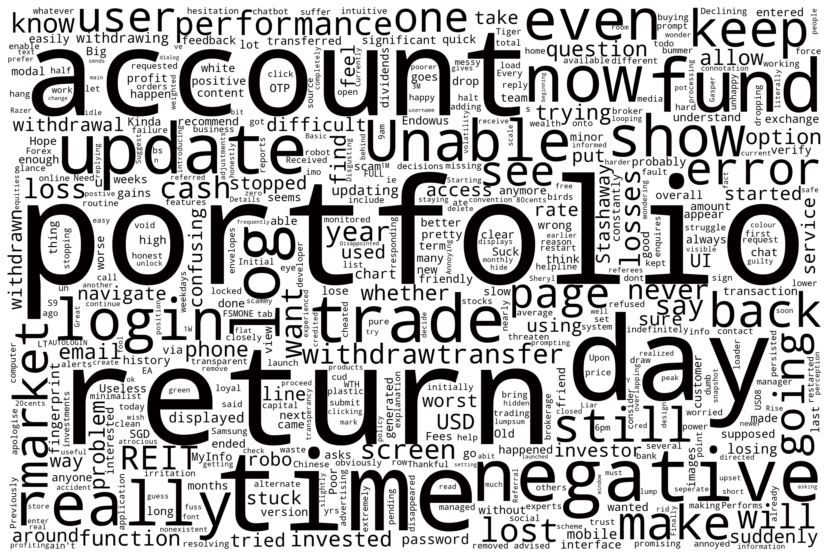

In [19]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the word color to black
word_cloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(word_cloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

# Postive Review Word Cloud

In [20]:
positive_review = " ".join(content for content in pos_content.content)
word_cloud = WordCloud(stopwords = stop_words, collocations = False, background_color = 'white', width=3000, height=2000, max_words=500).generate(positive_review)

(-0.5, 2999.5, 1999.5, -0.5)

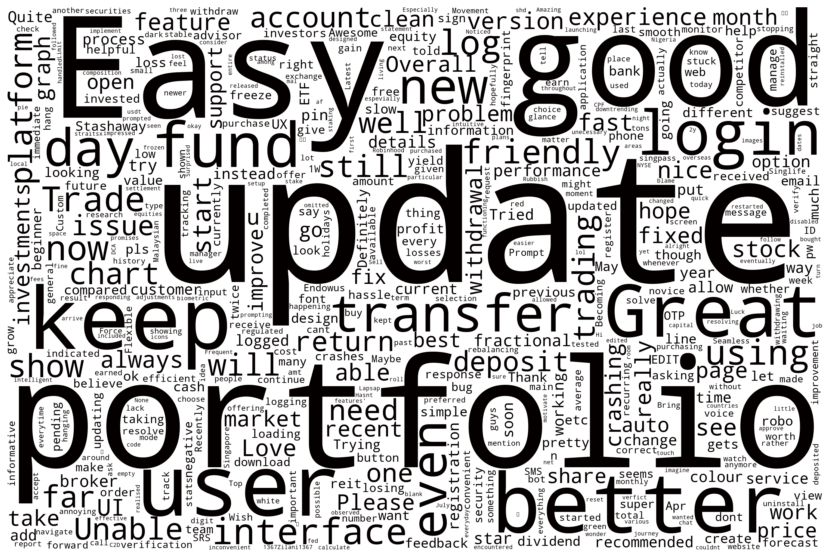

In [21]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the word color to black
word_cloud.recolor(color_func = black_color_func)
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(word_cloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")

# Text Processing

In [22]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [23]:
# Clean the data
df["content"] = df["content"].str.lower()
df["content"] = df["content"].str.replace(r"[^a-zA-Z0-9]", " ")
df["content"] = df["content"].str.strip()

#text_data = df["content"].tolist()
text_data = df['content'].values.tolist()
text_data

<ipython-input-23-48b00e25e6f8>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["content"] = df["content"].str.replace(r"[^a-zA-Z0-9]", " ")


['old ui was better  now it s so difficult to navigate',
 'previously on login we cud see at a glance how our managed portfolios were doing  now you have to click into a tab to get that same info and it s more difficult to get birds eye view  it s going to be a routine source of irritation  the home page now is a todo list of things like set up cash  or syfe trade which i obviously haven t done for a reason  ie don t want to   hope the team can consider going back to old ui  been a loyal happy user for many yrs  now an annoyed one',
 'hi syfe  i m looking forward for syfe to offer using cpf and srs in investments  any such plans soon to implement these options for investors',
 'great so far  i keep losing money  though i can t blame the app for that lol',
 'app is not launching',
 'unable to log in   prompted to put in verification code but didn t receive any sms  unable to also get any voice otp  have restarted phone  reinstalled app as well  tried all options but still unable to log 

In [24]:
import string

text_data = [text.translate(str.maketrans("", "", string.punctuation)) for text in text_data]
text_data = [text.translate(str.maketrans("", "", string.digits)) for text in text_data]

text_data

['old ui was better  now it s so difficult to navigate',
 'previously on login we cud see at a glance how our managed portfolios were doing  now you have to click into a tab to get that same info and it s more difficult to get birds eye view  it s going to be a routine source of irritation  the home page now is a todo list of things like set up cash  or syfe trade which i obviously haven t done for a reason  ie don t want to   hope the team can consider going back to old ui  been a loyal happy user for many yrs  now an annoyed one',
 'hi syfe  i m looking forward for syfe to offer using cpf and srs in investments  any such plans soon to implement these options for investors',
 'great so far  i keep losing money  though i can t blame the app for that lol',
 'app is not launching',
 'unable to log in   prompted to put in verification code but didn t receive any sms  unable to also get any voice otp  have restarted phone  reinstalled app as well  tried all options but still unable to log 

In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words("english"))
stop_words = ['invest', 'investing', 'investment', 'Endowus', 'endowus', 'easy', 'great', 'good', 'bad', 'App', 'app', 'use', 'money'] + list(STOPWORDS)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
from tqdm import tqdm
reviews_processed = []
for sentence in tqdm(text_data):
    reviews_processed.append(' '.join(token.lower() for token in nltk.word_tokenize(sentence) if token.lower() not in stop_words))

text_data = reviews_processed
text_data

100%|██████████| 272/272 [00:00<00:00, 4825.10it/s]


['old ui better difficult navigate',
 'previously login cud see glance managed portfolios click tab get info difficult get birds eye view going routine source irritation home page todo list things like set cash syfe trade obviously done reason ie want hope team consider going back old ui loyal happy user many yrs annoyed one',
 'hi syfe looking forward syfe offer using cpf srs investments plans soon implement options investors',
 'far keep losing though blame lol',
 'launching',
 'unable log prompted put verification code receive sms unable also get voice otp restarted phone reinstalled well tried options still unable log please help',
 'changed number unable log voice otp work bot work portfolio seen losses better',
 'response support',
 'none',
 'empty promises stuck profit lost',
 'okay account year net gain equity market downtrending might worth stake usdt exchanges apr staking much better',
 '',
 'team manager portfolio threaten times row refused apologise using syfe advised withd

In [27]:
# Perform lemmatization
lemmatizer = WordNetLemmatizer()

from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

# Lemmatize the text data

#text_data = [[lemmatizer.lemmatize(word, pos_tag([word])[0][1]) for word in text] for text in text_data]
#text_data

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [28]:
# Perform vectorization
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#text_data = vectorizer.fit_transform(text_data.apply(lambda text_data: " ".join(text_data)))

from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()
# Vectorize the text data
X = vectorizer.fit_transform(text_data)
print(X)

  (0, 660)	0.46219279588140016
  (0, 252)	0.47968402499236834
  (0, 96)	0.34668827445150197
  (0, 1113)	0.39569492061096695
  (0, 697)	0.5286906711518333
  (1, 699)	0.10740356424030596
  (1, 42)	0.16004232211112623
  (1, 1221)	0.16004232211112623
  (1, 619)	0.13032379359366975
  (1, 1141)	0.09065795292846879
  (1, 437)	0.14907409746769487
  (1, 599)	0.16004232211112623
  (1, 77)	0.1261538681143311
  (1, 181)	0.14907409746769487
  (1, 1051)	0.13032379359366975
  (1, 460)	0.11650546475835188
  (1, 1169)	0.12254171436307595
  (1, 473)	0.16004232211112623
  (1, 832)	0.16004232211112623
  (1, 267)	0.14907409746769487
  (1, 687)	0.16004232211112623
  (1, 1088)	0.10740356424030596
  (1, 1044)	0.07642662415624107
  (1, 130)	0.11935556895023842
  (1, 945)	0.14907409746769487
  :	:
  (267, 858)	0.23128197853318933
  (267, 1212)	0.2813584940408413
  (267, 306)	0.24596966827956437
  (267, 559)	0.173107838256655
  (269, 168)	0.6069825063060283
  (269, 715)	0.6069825063060283
  (269, 319)	0.51297609

# Kmeans and t-SNE

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Print the cluster assignments for each document
print(kmeans.labels_)

[4 4 0 2 0 0 0 0 0 0 4 0 0 0 0 4 0 0 0 0 4 0 2 1 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 1 0 0 0 1 0 1 0 4 0 0 0 2 0 0 1 0 0 0 0 0 0 4 0 1 0 0 4 0 0 3 0
 0 0 0 0 0 0 4 0 0 0 0 4 0 0 0 0 4 1 0 0 0 0 4 4 0 4 0 0 1 0 0 0 2 0 0 0 0
 0 0 3 4 4 0 3 0 1 0 3 0 0 3 0 3 3 3 3 0 3 3 0 1 2 0 0 4 2 1 0 0 0 4 0 4 4
 0 0 4 0 0 0 0 2 0 0 0 0 0 0 4 0 0 0 0 0 2 0 3 3 3 0 0 0 0 0 0 0 0 4 0 0 4
 4 0 1 0 0 0 0 0 0 0 3 0 3 1 0 2 1 4 1 4 0 4 0 0 0 2 4 1 0 0 0 1 0 1 0 4 0
 3 0 0 0 1 3 0 4 0 0 0 3 3 0 0 0 0 3 0 3 3 3 3 3 3 3 3 3 3 0 1 0 0 4 0 0 4
 3 0 0 0 0 0 0 0 4 0 0 0 4]


In [30]:
# Print the cluster centroids (i.e., the mean of the vectors in each cluster)
print(kmeans.cluster_centers_)

[[0.         0.0009705  0.01064606 ... 0.00120859 0.00578035 0.0010232 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.01230452 ... 0.         0.         0.        ]
 [0.00727246 0.         0.00332612 ... 0.         0.         0.        ]]


In [31]:

# Perform t-SNE dimensionality reduction on the vectorized data
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X.toarray())

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


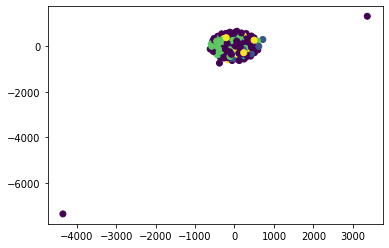

In [32]:
# Plot the clusters in the t-SNE space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


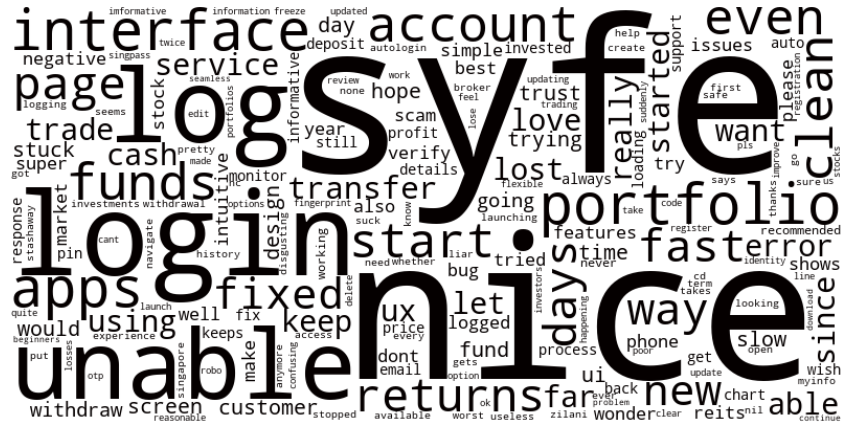

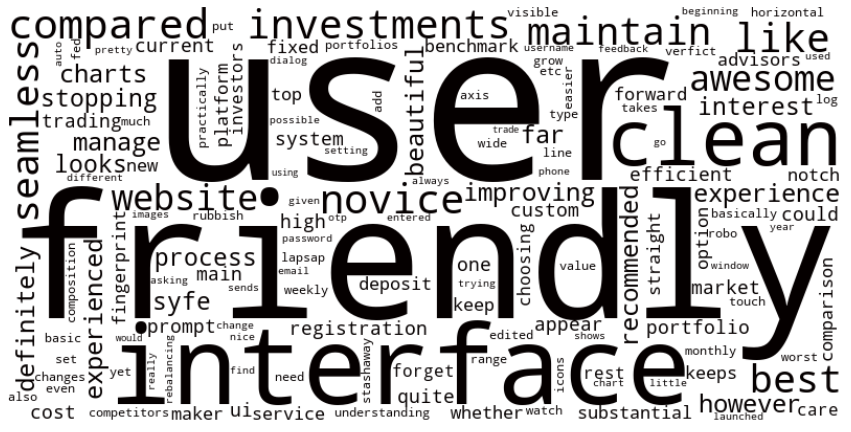

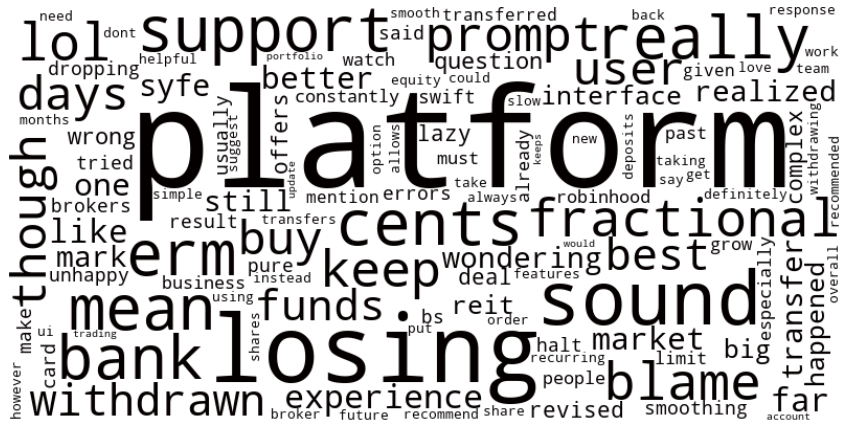

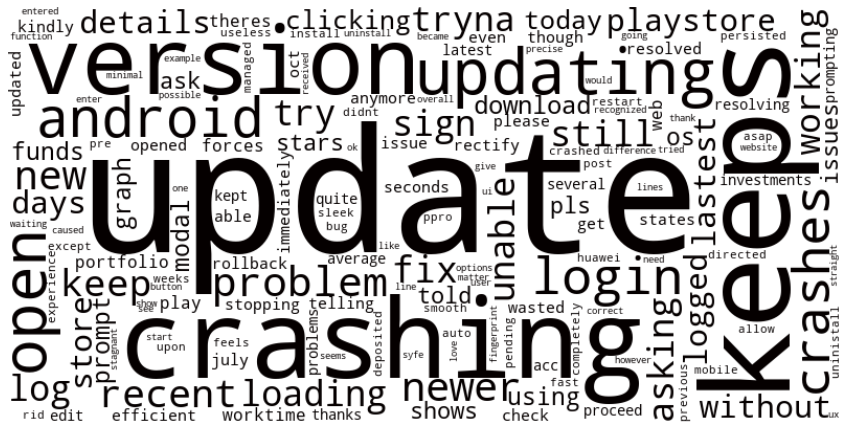

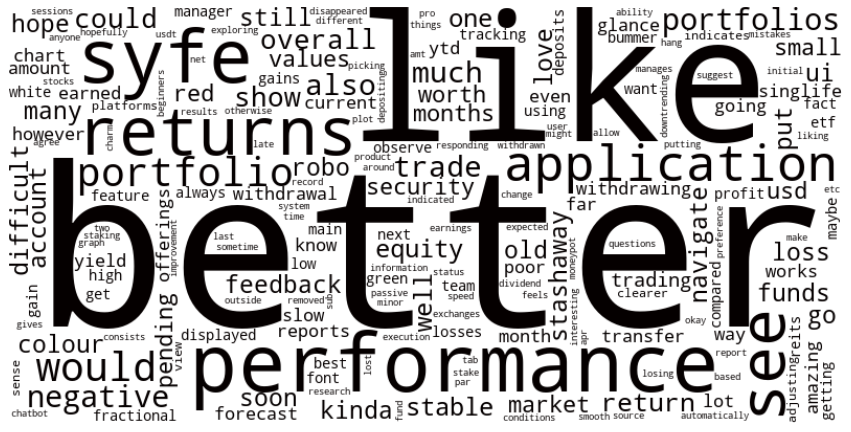

In [33]:
# Get the cluster assignments for each document
clusters = kmeans.labels_

# Create a dictionary of the words and their TF-IDF scores for each cluster
word_scores = {}
for i in range(kmeans.n_clusters):
    # Get the indices of the documents in the current cluster
    cluster_indices = [j for j, x in enumerate(clusters) if x == i]
    # Get the TF-IDF scores for the words in the current cluster
    cluster_scores = X[cluster_indices, :].sum(axis=0)
    # Convert the TF-IDF scores to a dictionary
    word_scores[i] = dict(zip(vectorizer.get_feature_names(), cluster_scores.flat))

# Create a word cloud for each cluster
for i in range(kmeans.n_clusters):
    wordcloud = WordCloud(background_color="white", width=800, height=400)
    wordcloud.generate_from_frequencies(word_scores[i])
    # set the word color to black
    wordcloud.recolor(color_func = black_color_func)
    # set the figsize
    plt.figure(figsize=[15,10])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()